In [1]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
from tuning_utils import tuning_hyper_parameter

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# BACKPROPAGATE NETWORK

In [10]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,1])

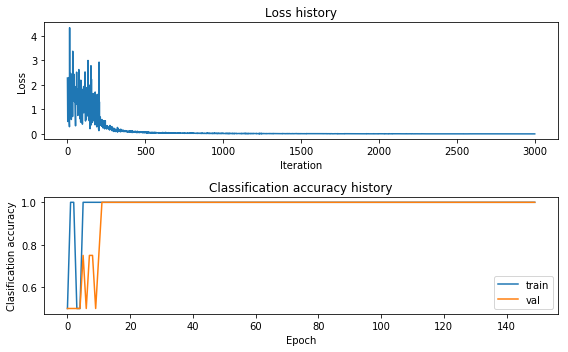

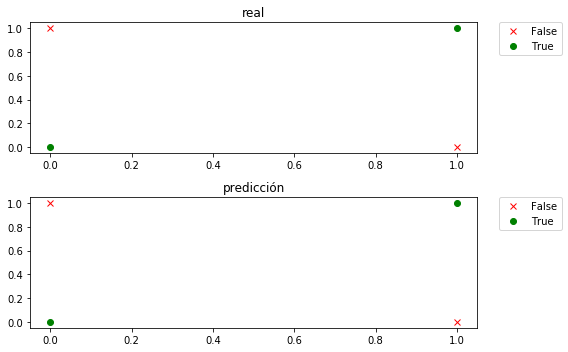

In [13]:
net_params = {'il':2,'hl1':2,'ol':2}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 1)
# results = net.train_sgd_momentum(X, y, X, y, learning_rate=2.1, 
#                                  learning_rate_decay=1, reg = 0.0,
#                                  max_iter = 400, batch_size = 2, 
#                                      verbose =  True,
#                                      rho=0.7, stochastic = False, 
#                                      epoch = 20)
# results = net.train_gradient_descent(X, y, X, y, learning_rate=2.1, 
#                                  learning_rate_decay=1, reg = 0.0,
#                                  max_iter = 400, 
#                                      verbose =  True, 
#                                      epoch = 20)
results = net.train_stochastic_gradient_descent(X, y, X, y, learning_rate=1, 
                                 learning_rate_decay=1, reg = 0.0,
                                 max_iter = 3000, batch_size = 2, 
                                     verbose =  True,
                                     epoch = 20)
plotStats(results)

y_pred = net.predict(X)
plotData(X, y, y_pred)

In [9]:
y_pred 

array([[1.],
       [0.],
       [0.],
       [1.]])

In [45]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,0])

[[ 0.30706358 -0.6031129 ]
 [-0.70311729  0.40436799]
 [-0.66383605  0.37522447]
 [-0.67452858  0.38255604]]
[[ 0.43677687 -0.61022143]
 [-0.59455557  0.38500374]
 [-0.55228771  0.35792627]
 [-0.58382495  0.35331572]]
[[ 0.61837574 -0.61556926]
 [-0.43223873  0.35832625]
 [-0.39410365  0.33446179]
 [-0.44518168  0.31004141]]
[[ 0.74126793 -0.61133017]
 [-0.30245445  0.33367979]
 [-0.27415628  0.31339237]
 [-0.31936219  0.26444567]]
[[ 0.783159   -0.59364341]
 [-0.2375078   0.31585742]
 [-0.21678063  0.29897749]
 [-0.23744342  0.22339343]]
[[ 0.76462814 -0.56323801]
 [-0.22166135  0.30525854]
 [-0.20495244  0.29141504]
 [-0.19256762  0.1889897 ]]
[[ 0.69551849 -0.52461307]
 [-0.23768743  0.2996186 ]
 [-0.22299005  0.28844199]
 [-0.1697107   0.16063031]]
[[ 0.58850265 -0.48417361]
 [-0.27180519  0.29574887]
 [-0.25856241  0.28692245]
 [-0.15694218  0.13689416]]
[[ 0.47700666 -0.44766649]
 [-0.30767618  0.29089464]
 [-0.29617932  0.2841304 ]
 [-0.14571618  0.11658121]]
[[ 0.39551358 -0.41

[[ 0.09666652 -0.09578439]
 [-0.06880929  0.06818556]
 [-0.06880957  0.06818576]
 [-0.00058397  0.0005669 ]]
[[ 0.09576591 -0.09489978]
 [-0.06817248  0.06755994]
 [-0.06817275  0.06756013]
 [-0.00056654  0.00055013]]
[[ 0.09488164 -0.09403106]
 [-0.0675471   0.06694545]
 [-0.06754735  0.06694563]
 [-0.00054979  0.00053402]]
[[ 0.09401325 -0.09317782]
 [-0.06693283  0.06634179]
 [-0.06693307  0.06634196]
 [-0.00053369  0.00051852]]
[[ 0.09316033 -0.09233965]
 [-0.0663294   0.06574869]
 [-0.06632962  0.06574885]
 [-0.00051821  0.00050361]]
[[ 0.09232248 -0.09151616]
 [-0.06573652  0.06516588]
 [-0.06573672  0.06516603]
 [-0.00050331  0.00048926]]
[[ 0.09149929 -0.09070697]
 [-0.06515391  0.06459308]
 [-0.06515411  0.06459322]
 [-0.00048897  0.00047545]]
[[ 0.09069039 -0.08991171]
 [-0.06458132  0.06403006]
 [-0.06458151  0.06403019]
 [-0.00047517  0.00046214]]
[[ 0.08989542 -0.08913003]
 [-0.0640185   0.06347656]
 [-0.06401867  0.06347668]
 [-0.00046187  0.00044933]]
[[ 0.08911401 -0.08

[[ 5.53955478e-02 -5.50994656e-02]
 [-3.95189270e-02  3.93081524e-02]
 [-3.95189341e-02  3.93081576e-02]
 [-9.92691964e-05  9.76148764e-05]]
[[ 5.51053400e-02 -5.48123025e-02]
 [-3.93123332e-02  3.91037193e-02]
 [-3.93123401e-02  3.91037243e-02]
 [-9.76475095e-05  9.60287875e-05]]
[[ 5.48181171e-02 -5.45280780e-02]
 [-3.91078577e-02  3.89013716e-02]
 [-3.91078644e-02  3.89013765e-02]
 [-9.60607230e-05  9.44766514e-05]]
[[ 5.45338335e-02 -5.42467473e-02]
 [-3.89054683e-02  3.87010780e-02]
 [-3.89054747e-02  3.87010827e-02]
 [-9.45079071e-05  9.29575682e-05]]
[[ 5.42524446e-02 -5.39682668e-02]
 [-3.87051334e-02  3.85028074e-02]
 [-3.87051396e-02  3.85028119e-02]
 [-9.29881614e-05  9.14706667e-05]]
[[ 5.39739067e-02 -5.36925937e-02]
 [-3.85068220e-02  3.83065295e-02]
 [-3.85068280e-02  3.83065339e-02]
 [-9.15006144e-05  9.00151029e-05]]
[[ 5.36981769e-02 -5.34196860e-02]
 [-3.83105041e-02  3.81122148e-02]
 [-3.83105099e-02  3.81122191e-02]
 [-9.00444217e-05  8.85900594e-05]]
[[ 5.34252134

[[ 3.92926965e-02 -3.91422859e-02]
 [-2.80463477e-02  2.79391076e-02]
 [-2.80463485e-02  2.79391082e-02]
 [-3.40539489e-05  3.36519795e-05]]
[[ 3.91511347e-02 -3.90017928e-02]
 [-2.79454165e-02  2.78389372e-02]
 [-2.79454173e-02  2.78389378e-02]
 [-3.36755369e-05  3.32794704e-05]]
[[ 3.90105791e-02 -3.88622946e-02]
 [-2.78452016e-02  2.77394750e-02]
 [-2.78452024e-02  2.77394756e-02]
 [-3.33026831e-05  3.29124119e-05]]
[[ 3.88710190e-02 -3.87237808e-02]
 [-2.77456954e-02  2.76407137e-02]
 [-2.77456961e-02  2.76407143e-02]
 [-3.29352860e-05  3.25507051e-05]]
[[ 3.87324438e-02 -3.85862411e-02]
 [-2.76468904e-02  2.75426458e-02]
 [-2.76468911e-02  2.75426463e-02]
 [-3.25732465e-05  3.21942528e-05]]
[[ 3.85948433e-02 -3.84496652e-02]
 [-2.75487792e-02  2.74452640e-02]
 [-2.75487799e-02  2.74452645e-02]
 [-3.22164676e-05  3.18429604e-05]]
[[ 3.84582073e-02 -3.83140430e-02]
 [-2.74513546e-02  2.73485613e-02]
 [-2.74513553e-02  2.73485618e-02]
 [-3.18648543e-05  3.14967352e-05]]
[[ 3.83225256

[[ 3.13578212e-02 -3.12615460e-02]
 [-2.23872588e-02  2.23185768e-02]
 [-2.23872590e-02  2.23185770e-02]
 [-1.69763089e-05  1.68164718e-05]]
[[ 3.12699228e-02 -3.11741813e-02]
 [-2.23245527e-02  2.22562510e-02]
 [-2.23245529e-02  2.22562512e-02]
 [-1.68303379e-05  1.66723201e-05]]
[[ 3.11833846e-02 -3.10881670e-02]
 [-2.22628166e-02  2.21948883e-02]
 [-2.22628168e-02  2.21948885e-02]
 [-1.66874656e-05  1.65312236e-05]]
[[ 3.10973217e-02 -3.10026237e-02]
 [-2.22014193e-02  2.21338613e-02]
 [-2.22014195e-02  2.21338614e-02]
 [-1.65462019e-05  1.63917109e-05]]
[[ 3.10117298e-02 -3.09175472e-02]
 [-2.21403576e-02  2.20731669e-02]
 [-2.21403577e-02  2.20731670e-02]
 [-1.64065235e-05  1.62537589e-05]]
[[ 3.09266046e-02 -3.08329333e-02]
 [-2.20796285e-02  2.20128021e-02]
 [-2.20796287e-02  2.20128023e-02]
 [-1.62684076e-05  1.61173456e-05]]
[[ 3.08419422e-02 -3.07487779e-02]
 [-2.20192292e-02  2.19527642e-02]
 [-2.20192293e-02  2.19527644e-02]
 [-1.61318322e-05  1.59824491e-05]]
[[ 3.07577385

[[ 2.69032931e-02 -2.68322235e-02]
 [-1.92089932e-02  1.91582788e-02]
 [-1.92089933e-02  1.91582789e-02]
 [-1.06047661e-05  1.05191220e-05]]
[[ 2.68403466e-02 -2.67696063e-02]
 [-1.91640753e-02  1.91135957e-02]
 [-1.91640754e-02  1.91135958e-02]
 [-1.05288870e-05  1.04440549e-05]]
[[ 2.67783176e-02 -2.67079011e-02]
 [-1.91198120e-02  1.90695633e-02]
 [-1.91198121e-02  1.90695633e-02]
 [-1.04544764e-05  1.03704388e-05]]
[[ 2.67165736e-02 -2.66464785e-02]
 [-1.90757519e-02  1.90257324e-02]
 [-1.90757520e-02  1.90257324e-02]
 [-1.03807639e-05  1.02975115e-05]]
[[ 2.66551122e-02 -2.65853365e-02]
 [-1.90318933e-02  1.89821015e-02]
 [-1.90318934e-02  1.89821016e-02]
 [-1.03077411e-05  1.02252647e-05]]
[[ 2.65939314e-02 -2.65244728e-02]
 [-1.89882348e-02  1.89386691e-02]
 [-1.89882349e-02  1.89386692e-02]
 [-1.02353997e-05  1.01536903e-05]]
[[ 2.65330291e-02 -2.64638855e-02]
 [-1.89447748e-02  1.88954338e-02]
 [-1.89447749e-02  1.88954338e-02]
 [-1.01637315e-05  1.00827803e-05]]
[[ 2.64724032

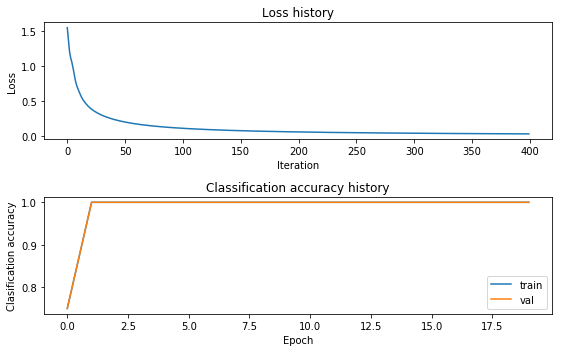

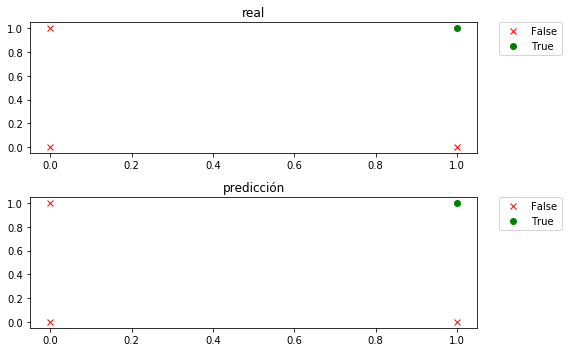

In [46]:
net_params = {'il':2,'ol':2}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 0.5)

results = net.train_sgd_momentum(X, y, X, y, learning_rate=0.9, 
                                 learning_rate_decay=0.99, reg = 0.0,
                                 max_iter = 400, batch_size = 1, verbose =  True, rho = 0.70, stochastic = False)

plotStats(results)
y_pred = net.predict(X)
plotData(X, y, y_pred)

# PERCEPTRON

## Linealmente separable

In [200]:
X = np.array([[1,1,1],
              [1,0,1],
              [1,1,0],
              [1,0,0]])

y = np.array([1,0,0,0])

w = np.random.rand(3)


In [201]:
P = []
N = []
for i in range(len(y)):
    if y[i] == 1:
        P.append(i)
    else:
        N.append(i)

In [202]:
def checkConvergence(X, w, y):
    score = X @ w
    d = ((score) > 0).astype(int)
    if np.linalg.norm(d-y) <= 0.1:
        return True, 0
    else:
        return False, np.linalg.norm(d-y)
    
def predict(X, w):
    score = X @ w
    d = ((score) > 0).astype(int)
    return d

In [203]:
from tqdm.autonotebook import tqdm

convergence = False
cont = 0
with tqdm() as pbar:
    while convergence != True:
        indx = np.random.choice(4)
        x = X[indx]
        if indx in P and int(x.dot(w))<=0:
            w = w + x
        if indx in N and int(x.dot(w))>=0:
            w = w - x
        convergence, dif = checkConvergence(X, w, y)
        pbar.set_description(f'dif {dif}')
        cont += 1
        if cont > 500:
            print('Stuck Method')
            break
        pbar.update(1)

In [204]:
predict(X,w)

array([1, 0, 0, 0])

In [287]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,0])

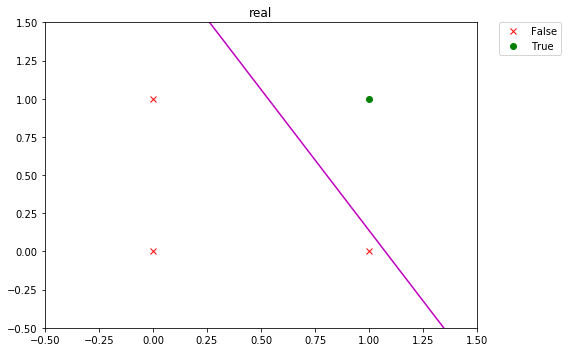

In [206]:
plt.title('real')
cross, = plt.plot([],[],'rx')
good, = plt.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i,0], X[i,1], 'rx')
    else:
        plt.plot(X[i,0],X[i,1], 'go')
plt.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
x_var = np.linspace(-0.5,1.5,10)
y_var = -x_var * (w[1]/w[2]) - w[0]/w[2]
plt.ylim(-0.5,1.5)
plt.xlim(-0.5,1.5)
plt.plot(x_var, y_var, 'm-')
plt.tight_layout()

## linealmente no separable

In [346]:
X = np.array([[1,1,1],
              [1,0,1],
              [1,1,0],
              [1,0,0]])

y = np.array([0,1,1,0])

w1 = np.random.rand(3,2)
w2 = np.random.rand(3)

In [347]:
w1 = np.array([[-0.5, 1.5],
               [1, -1],
               [1, -1]])

w2 = np.array([-1.5, 1, 1])

In [348]:
P = []
N = []
for i in range(len(y)):
    if y[i] == 1:
        P.append(i)
    else:
        N.append(i)

In [349]:
def checkConvergence(X, w1, w2, y):
    fcl1 = np.hstack((np.ones((4,1)),X.dot(w1)))
    fcl2 = fcl1.dot(w2)
    d = ((fcl2) > 0).astype(int)
    if np.linalg.norm(d-y) <= 0.1:
        return True, 0
    else:
        return False, np.linalg.norm(d-y)
    
def predict(X,w1, w2):
    fcl1 = np.hstack((np.ones((4,1)),X.dot(w1)))
#     print(fcl1)
    fcl1 = step(fcl1)
#     print(fcl1)
    fcl2 = fcl1.dot(w2)
#     print(fcl2)
    d = ((fcl2) > 0).astype(int)
    return d

def step(z):
    h = (z > 0).astype(int) - (z <= 0).astype(int)
    return h

In [350]:
y_pred = predict(X, w1, w2)
y_pred

array([0, 1, 1, 0])

In [351]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([0,1,1,0])

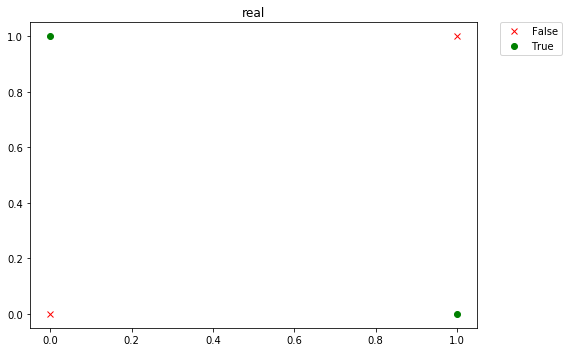

In [353]:
plt.title('real')
cross, = plt.plot([],[],'rx')
good, = plt.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i,0], X[i,1], 'rx')
    else:
        plt.plot(X[i,0],X[i,1], 'go')
plt.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()

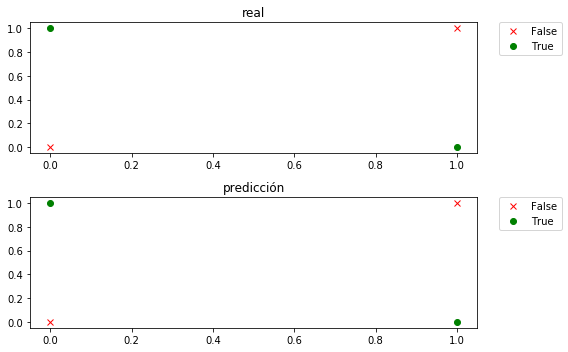

In [352]:
plotData(X, y, y_pred)